# Project: Writing a Data Scientists Blog Post

In this notebook I will be applying the CRIPS DM Process to analise survey results and draw conclusions.

# 1. Importing the data

In [6]:
import pandas as pd
import os
import glob
from collections import Counter
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppress all warnings
warnings.filterwarnings('ignore')

In [7]:
def load_year_from_csv(year):
    '''
    This function loads a dataframes from a .csv file in a specific directory structure:
    os.path.join('..', 'data', 'stack-overflow-developer-survey-' + year)
    The structure contains a path element (year) that must match a string given to the function.    
    
    INPUT - year - string that matches the last directory in the data structure
            
    OUTPUT - 
            df - dataframe containing the content of the .csv 
    '''
    # defining the directory
    directory_path = os.path.join('..', 'data', 'stack-overflow-developer-survey-' + year)

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

    try:
        df = pd.read_csv(csv_files[0], sep=',', encoding='ISO-8859-1')
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")

    return df

# creating a list of all the years we want to analise
years = ['2024', '2023', '2022',
    	 '2021', '2020', '2019']

data = []

for year in years:
    print('loading data for: ', year)
    data.append(load_year_from_csv(year));

loading data for:  2024
loading data for:  2023
loading data for:  2022
loading data for:  2021
loading data for:  2020
loading data for:  2019


In [8]:
# Verify that both lists have the same length
assert len(years) == len(data), "The lists must have the same length"

# Pair each string with its corresponding DataFrame
paired_list = zip(years, data)

# Convert the paired list to a dictionary
data_dict_raw = dict(paired_list)

# 2. Assessing the Survey compability over the years

In order to get an overview of the consistency of the survey over the years, we want to identify common questions and similarities over the years. With this information we can narrow down the timeframe for our most relevant questions.

In [9]:
def bar_column_names(df_dict, years):   
    '''
    This function plots a bar chart containing the most common column names of a dict of dataframes
    
    INPUT - df_dict - dictionary containing dataframes for multiple years of the survey
            years - list of strings containing the years relevant for the plots
    OUTPUT - 
            bar chart of the most common column names in all years
    '''
    # Extract column names
    column_names = {year: set(data.columns) for year, data in df_dict.items()}

    # Find columns common to all DataFrames
    common_columns = set.intersection(*column_names.values())

    # Extract column names for the selected years
    all_columns_selected_years = []
    for year in years:
        if year in df_dict:
            all_columns_selected_years.extend(df_dict[year].columns)

    # # Remove duplicates by converting the list to a set and back to a list
    # all_columns_selected_years = list(set(all_columns_selected_years))

    # Count the frequency of each column name
    column_counter_selected_years = Counter(all_columns_selected_years)

    # Select the 20 most common columns between the years of the survey
    top_30_columns = column_counter_selected_years.most_common(30)

    # Separate keys and values for plotting
    labels, values = zip(*top_30_columns)

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Items')
    plt.title('Top 20 Items in Counter')
    plt.gca().invert_yaxis()  # Invert y-axis to show the largest count at the top
    plt.tight_layout()
    plt.show()

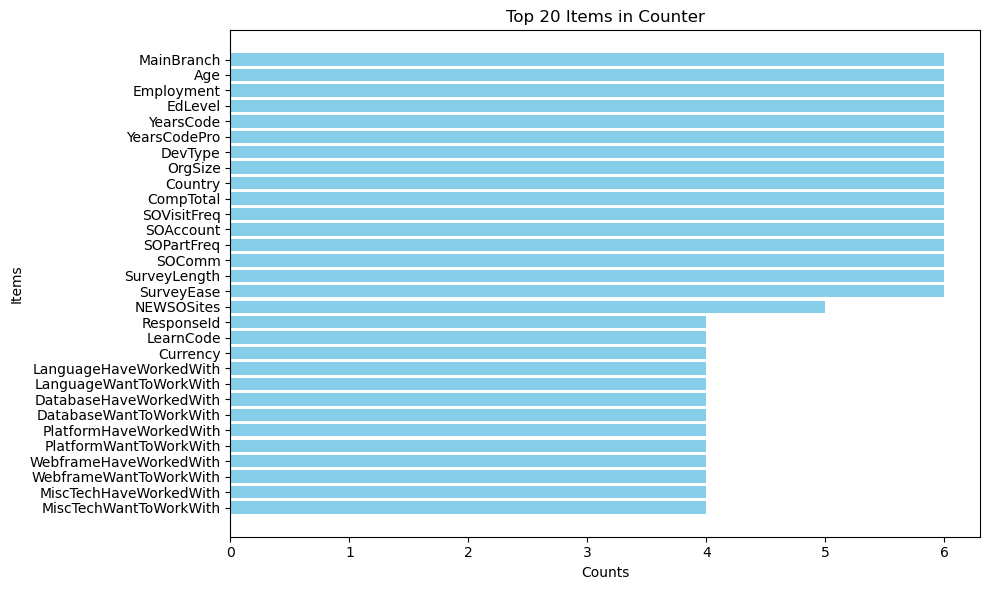

In [10]:
# Define the years for which you want to extract column names
selected_years = years[:]

# plot a bar chart of the most common column names
bar_column_names(data_dict_raw, selected_years)

We must rename certain columns for the 2019 and 2020 survey results to match them to later results.

In [11]:
data_dict = data_dict_raw

# renaming interesting columns in the 2020 dataframe for consistency over the years
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

# renaming interesting columns in the 2019 dataframe for consistency over the years
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

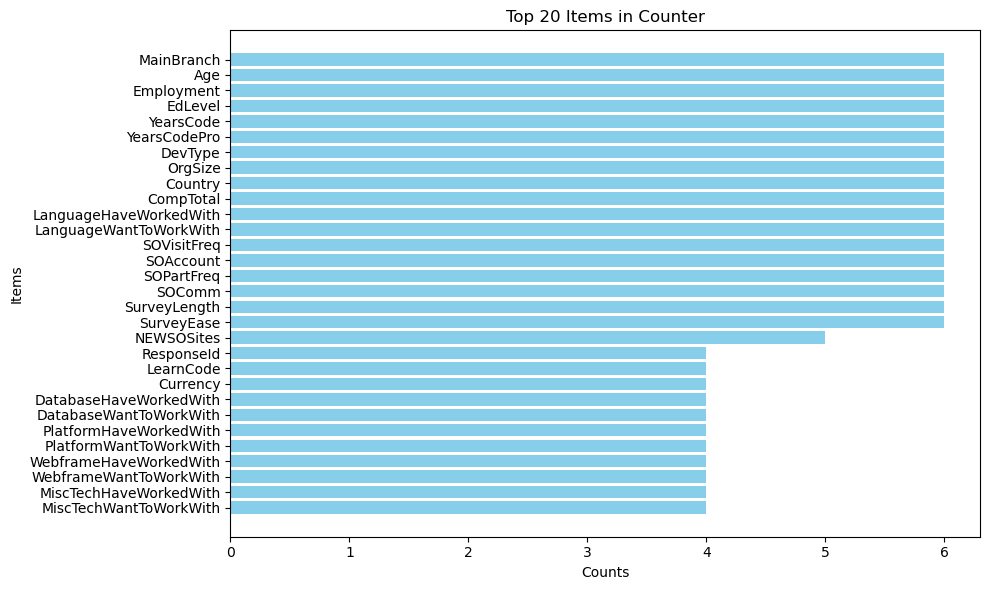

In [12]:
# plot a bar chart of the most common column names
bar_column_names(data_dict, selected_years)

In [13]:
# check which years yield a certain column name for getting a better overview of the data
NamesToCheck = ['Year', 'Country', 'Employment', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',\
                'Age', 'Currency', 'Gender', 'MainBranch', 'EdLevel', 'OrgSize', 'YearsCode', 'YearsCodePro',\
                'CompTotal', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm']

for Name in NamesToCheck:
    print(Name + ': ')
    sumForName = 0
    for year in data_dict:
        if sum(data_dict[year].columns == Name):
            # print(year)
            sumForName += 1
        else:
            print('Missing: ' + year)
            
    print(sumForName)


Year: 
Missing: 2024
Missing: 2023
Missing: 2022
Missing: 2021
Missing: 2020
Missing: 2019
0
Country: 
6
Employment: 
6
DevType: 
6
LanguageHaveWorkedWith: 
6
LanguageWantToWorkWith: 
6
Age: 
6
Currency: 
Missing: 2020
Missing: 2019
4
Gender: 
Missing: 2024
Missing: 2023
4
MainBranch: 
6
EdLevel: 
6
OrgSize: 
6
YearsCode: 
6
YearsCodePro: 
6
CompTotal: 
6
SOVisitFreq: 
6
SOAccount: 
6
SOPartFreq: 
6
SOComm: 
6


In [14]:
# cheching the dimensions of the data
for year, df in data_dict.items():
    print(year + ' survey size: ')
    print(df.shape)

2024 survey size: 
(65437, 114)
2023 survey size: 
(89184, 84)
2022 survey size: 
(73268, 79)
2021 survey size: 
(83439, 48)
2020 survey size: 
(64461, 61)
2019 survey size: 
(88883, 85)


# 3. CRISP-DM Process
At this point we gained a little bit of an understanding of the survay variation over time and definied a timeframe in which we can use the survey effectively 2019-2024. Now we can implement the CRIPS-DM Process.


## 3.1 Business Understanding
The first step in the process is the build up of business understanding. We need to formulate questions to tackle.


#### QUESTION 1:
Which programming languages were most commonly used?

#### QUESTION 2:
Which languages gained influence over the past years?

#### QUESTION 3:
How popular are languages among their user base?

## 3.2 Data Understanding
Before we answer the defined questions we need to take a closer look at the data and clean it.

In [15]:
# Concatenate the df's into a single one and adding a year column
survey_list = []

for year, df in data_dict.items():
    df['Year'] = year
    survey_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(survey_list, ignore_index=True)


In [16]:
relevant_colomns = NamesToCheck

# create a df witch only contains the columns we are interested in
reduced_df = combined_df[relevant_colomns]
reduced_df.shape

(464672, 19)

In [17]:
# check the number of NaN's for all columns in the DataFrame
reduced_df.isnull().mean().sort_values(ascending=False, axis=0)*100


Currency                  51.716049
CompTotal                 44.403579
Gender                    37.783641
OrgSize                   26.741228
YearsCodePro              24.360624
SOPartFreq                22.835032
DevType                   15.035122
LanguageWantToWorkWith     9.934319
Age                        6.895617
LanguageHaveWorkedWith     4.198230
SOComm                     4.192850
SOVisitFreq                4.172621
YearsCode                  4.040269
SOAccount                  3.987759
EdLevel                    3.743931
Country                    2.095241
Employment                 1.134133
MainBranch                 0.183140
Year                       0.000000
dtype: float64

In [18]:
# We need to further thin out the df and drop columns not
# relevant for our research questions. Espacially columns with many NaN's
print(reduced_df.shape)
reduced_df = reduced_df.drop(['Currency', 'CompTotal', 'Gender', 'OrgSize', 'YearsCodePro'], axis=1)
print(reduced_df.shape)
# drop the rows conataining (any) NaN's and check the shape of the df
reduced_df = reduced_df.dropna()
print(reduced_df.shape)

(464672, 19)
(464672, 14)
(280681, 14)


In [19]:
# Assert that the data contains no NaN's
assert reduced_df.isna().sum().sum() == 0

## 3.3 Prepare Data
### Question 1: Which programming languages were most commonly used?

In [20]:
def isolate_column_to_df(df, years, column_name):
    '''
    This function seperates multiple entrys of a column via the delimantor ";". It returns a dataframe
    with the components of a single column as multiple columns and years for rows.

    INPUT - df - dataframe containing the column to be isolated
            years - list of strings containing the years we want to include
            column_name - string of column to be isolated
        
    OUTPUT - 
            entry_df - dataframe of the selected column with its components as column and the year as rows
            components - list of strings conatining the components which were isolated from the given column
                         this list defines the rows of the dataframe
    '''
    def get_component_entry(year, column_name, component_entry):
        entry = (df[df['Year']==year]\
                [column_name].str.contains(component_entry, regex=False).sum())
    
        return entry

    # value counts gives us a series with index Answer
    column_vc = df[df['Year']=='2020'][column_name].value_counts()

    # loop through vc and isolate single component
    components = []
    for answer in column_vc.index:
        new_elements = answer.split(';')
        for element in new_elements:
            if element not in components:
                components.append(element)

    # create a dataframe with years as rows and components as columns
    entry_list = []

    # loop over years and components
    for year in years:
        for component in components:
            entry = get_component_entry(year, column_name, component)
            entry_list.append({"Year": year, "Component": component, "Entry": entry})

    # convert the list of entrys to a df
    entry_df = pd.DataFrame(entry_list)

    # Pivot the df to reshape it
    entry_df = entry_df.pivot(index='Year', columns="Component", values='Entry')
    entry_df = entry_df.sort_values(by='2019', ascending=False, axis=1)

    return entry_df, components
    

In [21]:
# list of years
years = ['2019', '2020', '2021', '2022', '2023', '2024']
column_name = 'LanguageHaveWorkedWith'

num_have_worked, comp_have_worked = isolate_column_to_df(reduced_df, years, column_name)

# Drop columns that contain at least one zero
num_have_worked = num_have_worked.loc[:, (num_have_worked != 0).all(axis=0)]


In [22]:
def plot_stacked_bar(df, ylabel, title, length=-1 , value_plot=False):
    '''
    This function creates multiple stacked bar plot for data represented as ratios

    INPUT - df - dataframe to plot
            ylabel - label of the y- axis
            title - title of the plot
            values=False -  bool to determine if values should be plotted
       
    OUTPUT - 
            plot of stacked bar chart
    '''
    # Create the language list baed on length

    components = df.sum().index.to_list()[: length]
    print(components)

    # Generate a color palette with a unique color per language
    palette = sns.color_palette("tab20", len(components))

    # set the figure size
    plt.figure(figsize=(8, 6))
    plt.stackplot

    # define an array to store the sum of all previous values in the bar
    bottom = np.zeros(df.shape[0])
    for component, color in zip(components, palette):
        bars = plt.bar(df.index, df[component], bottom=bottom, color=color, label=component)
        # Annotate each bar with its ratio value
        if value_plot==True:
            for bar in bars:
                height = bar.get_height()
                plt.text(
                    bar.get_x() + bar.get_width() / 2,  # placement in the center of the bar
                    bar.get_y() + height / 2,           # placement in the middle of the stacked segment
                    f'{height:.1f}',                    # text to display with 1 decimal place
                    ha='center',                        # horizontal alignment
                    va='center',                        # vertical alignment
                    fontsize=7,                         # font size
                    color='black'                       # text color
                )
        bottom += df[component]  # Update bottom to stack next bar on top

    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title='Language', bbox_to_anchor=(1.0, 1.0))

To test our plot function and to gain an overview about the number of replys to "haveworkedwith" we first plot num_have_worked as a stacked bar chart

['C', 'Java', 'JavaScript', 'HTML/CSS', 'SQL', 'Python', 'C#', 'PHP', 'TypeScript', 'C++', 'R', 'Ruby', 'Go', 'Swift', 'Kotlin', 'Assembly', 'VBA', 'Objective-C', 'Scala', 'Rust']


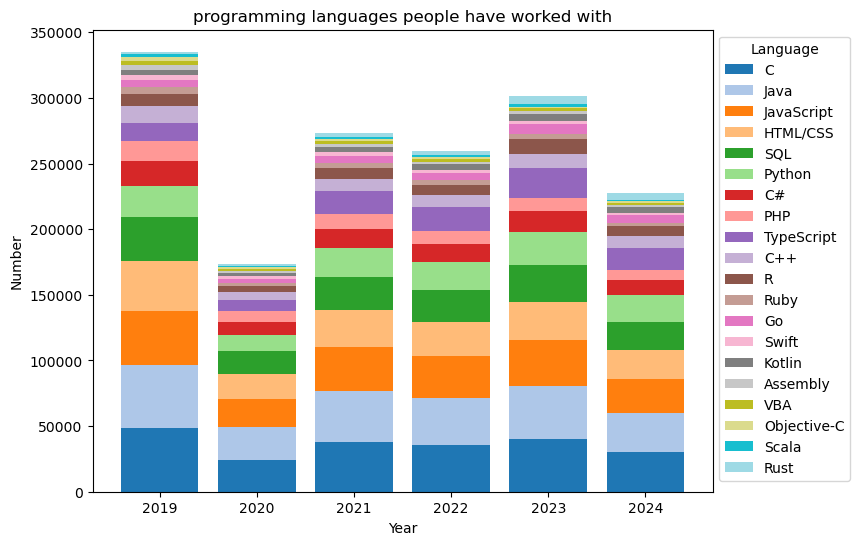

In [23]:
# plot the number of people who worked with a certain language using plot_stacked_bar
plot_stacked_bar(num_have_worked, 'Number',\
                 'programming languages people have worked with',-1, False)    

To compare different years with different survey participation to each other we need to express the languages as ratios of all given languages within a year.

In [24]:
# determine the ratio of used programming languages in relation to the whole number of languages used for every given year
ratio_list = []
for year in years:
    ratio = num_have_worked[num_have_worked.index == year].sum() / num_have_worked[num_have_worked.index == year].sum().sum()
    ratio_list.append(ratio)

ratio_have_worked = pd.DataFrame(ratio_list, index=years)

# prepare a df to plot by bundleing the small entrys as "Other"
plot_ratio_have_worked = ratio_have_worked.iloc[:, :11]
plot_ratio_have_worked['Other'] = ratio_have_worked.iloc[:, 11:].sum(axis=1)
    

['C', 'Java', 'JavaScript', 'HTML/CSS', 'SQL', 'Python', 'C#', 'PHP', 'TypeScript', 'C++', 'R', 'Other']


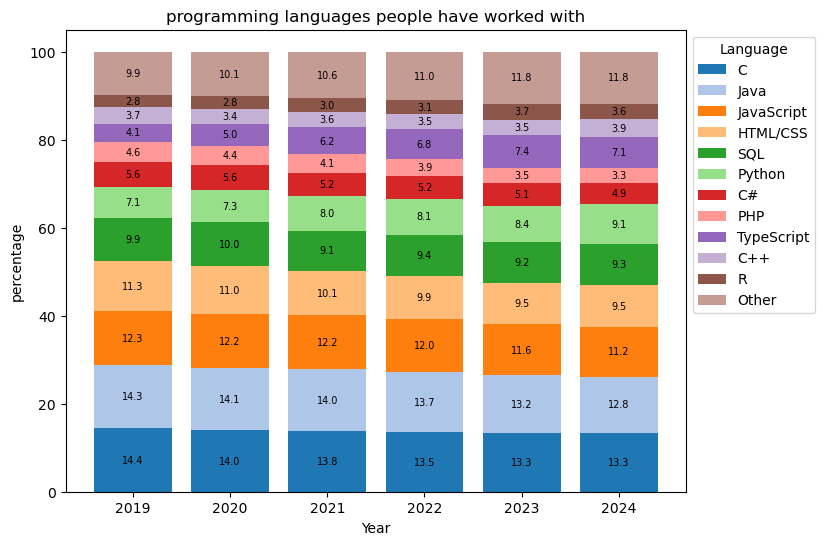

In [25]:
# plot the graph using plot_stacked_bar
plot_stacked_bar(plot_ratio_have_worked*100, 'percentage',\
                 'programming languages people have worked with',12, True)                

## 3.4 Model Data
### Question 2: Which languages gained influence over the past years?

It should be interesting to explicitly determine the difference between a given year and the year before. This way we can determine which languages gained useage over a given year.

In [26]:
# calculate yearly difference
def calc_yearly_diff(df):
    '''
    This function calculates the difference gained / lost of a dataframe in terms of one row (year) to
    the next and returns it as a dataframe with one row less then the input

    INPUT - df - dataframe to calculate difference from
        
    OUTPUT - 
            differences_df - dataframe with the difference from each year to the following
    '''
    years = df.index
    differences = []
    for row_index in range(df.shape[0] - 1):
         
        difference =   df.iloc[row_index + 1].values.flatten()\
                     - df.iloc[row_index].values.flatten()
        differences.append(difference)

    differences_df = pd.DataFrame(differences, columns=df.columns, index=years[1:])
    differences_df = differences_df.sort_values(by='2020', ascending=False, axis=1)

    return differences_df

In [27]:
# calculate the yearly difference
diff_ratio_have_worked = calc_yearly_diff(ratio_have_worked)
# add a row "Total" which contains the sum of all the rows from above
diff_ratio_have_worked.loc['Mean']= diff_ratio_have_worked.mean(numeric_only=True)
diff_ratio_have_worked

Component,TypeScript,Dart,Rust,Kotlin,Python,Go,SQL,VBA,C#,R,...,JavaScript,Swift,Objective-C,Ruby,PHP,Java,HTML/CSS,Assembly,C++,C
2020,0.009693,0.002983,0.002741,0.002645,0.001650,0.001363,0.000969,0.000761,0.000509,0.000200,...,-0.000430,-0.001137,-0.001169,-0.001763,-0.001985,-0.002305,-0.003051,-0.003261,-0.003716,-0.004284
2021,0.011247,0.004393,0.002590,0.001281,0.006946,0.002328,-0.008043,-0.000943,-0.004228,0.001665,...,-0.000330,-0.000926,-0.001802,0.000063,-0.003130,-0.000825,-0.008570,-0.000665,0.002035,-0.001697
2022,0.006417,0.001058,0.003479,0.001279,0.001655,0.002177,0.002037,-0.000722,-0.000496,0.000908,...,-0.002054,-0.000552,-0.001036,-0.001832,-0.002573,-0.002918,-0.002746,0.000499,-0.000704,-0.003609
2023,0.005994,-0.000858,0.006549,-0.000008,0.002540,0.003941,-0.001860,-0.001831,-0.000922,0.005780,...,-0.003950,-0.000389,-0.000187,0.000359,-0.003999,-0.005543,-0.003985,0.000078,0.000280,-0.002277
2024,-0.002653,0.000301,0.001351,0.000807,0.007147,-0.000633,0.001322,0.000232,-0.001547,-0.001012,...,-0.003659,-0.000183,-0.000639,-0.002334,-0.001643,-0.003227,0.000691,0.001544,0.004015,0.000798
Mean,0.006140,0.001575,0.003342,0.001201,0.003988,0.001835,-0.001115,-0.000501,-0.001337,0.001508,...,-0.002085,-0.000637,-0.000967,-0.001101,-0.002666,-0.002964,-0.003532,-0.000361,0.000382,-0.002214


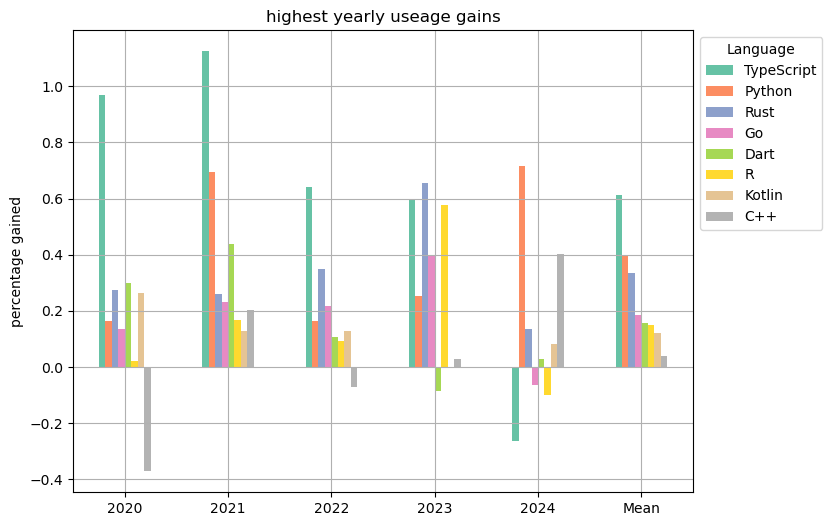

In [28]:
# calculate the biggest gains from 2019 to 2024
diff_ratio_comp = diff_ratio_have_worked.sum().sort_values(ascending=False)
# diff_ratio_comp.head(10)
# store the names of the languages with the highest gains in a list
language_gain = diff_ratio_comp[:8]
# diff_ratio_have_worked.iloc[:, :20].plot(kind='bar', figsize=(10, 8), grid=True, colormap='tab20c')
(diff_ratio_have_worked[language_gain.index]*100).plot(kind='bar', figsize=(8, 6), rot=0,\
    grid=True, colormap='Set2', ylabel='percentage gained', title='highest yearly useage gains')
plt.legend(title='Language', bbox_to_anchor=(1.0, 1.0))

### QUESTION 3: How popular are languages among their user base?

The question about programming languages was framed in the following way:

"Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"

This gives us an opportunity to determine the popularity of a language an a yearly and participant basis.

At first we need to create the same data structure as before for languages people wanted to work with.

In [29]:
# define the column we want to isolate
column_name = 'LanguageWantToWorkWith'

# use the function to isolate a column and get all the entries of its component
num_wanted_work, comp_wanted_work = isolate_column_to_df(reduced_df, years, column_name)

# Drop columns that contain at least one zero
num_wanted_work = num_wanted_work.loc[:, (num_wanted_work != 0).all(axis=0)]

num_wanted_work.head(10)

Component,C,Java,JavaScript,Python,HTML/CSS,SQL,TypeScript,C#,R,Go,...,Kotlin,PHP,Assembly,Rust,Swift,Ruby,Scala,Dart,Objective-C,VBA
Year,,,,,,,,,,,,,,,,,,,,,
2019,40761,38410,32449,27568,26234,24184,18201,16038,15122,12641,...,9812,8701,8171,7386,6446,5062,4127,3303,1915,954
2020,18859,18015,15214,14442,12054,11688,10838,7932,9464,7647,...,5540,3609,976,6160,3166,2313,2007,2665,725,440
2021,31339,28869,24468,21360,19160,18246,18983,11746,14294,11022,...,7079,5664,1532,9985,4196,3350,2250,4551,882,644
2022,29184,26467,22588,19915,17931,18234,19399,11248,14589,11394,...,6635,5172,1542,11311,3681,2775,1821,4383,618,592
2023,33503,28316,24144,22589,20192,20850,22537,12896,20199,12434,...,7240,5555,1878,16906,3867,3000,1911,4146,662,590
2024,26213,21229,17794,18337,15455,16761,15316,9703,14639,9987,...,5630,4332,2011,12386,2963,2075,1292,2893,517,510


In [30]:
# determine the proportion of given languages in relation to the total number of given answers
ratio_list = []
for year in years:
    ratio = num_wanted_work[num_wanted_work.index == year].sum() / num_wanted_work[num_wanted_work.index == year].sum().sum()
    ratio_list.append(ratio)

ratio_wanted_work = pd.DataFrame(ratio_list, index=years)

['C', 'Java', 'JavaScript', 'Python', 'HTML/CSS', 'SQL', 'TypeScript', 'C#', 'R', 'Go', 'C++', 'Other']


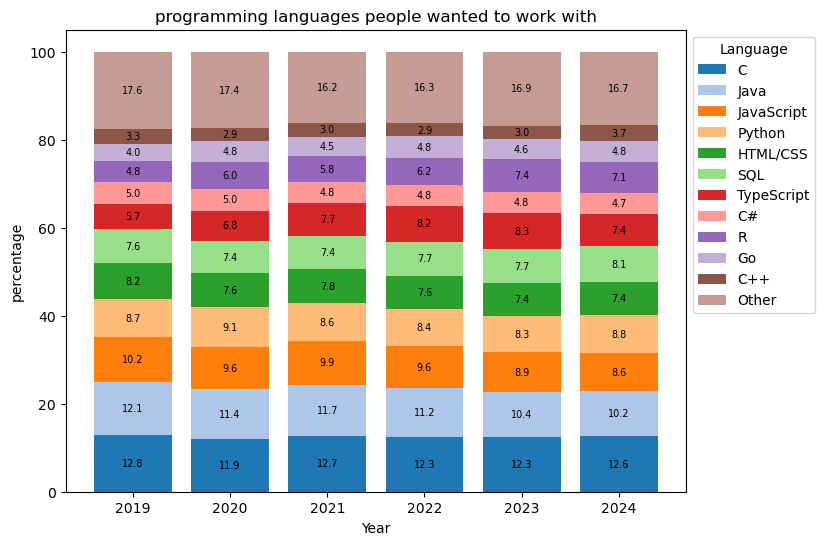

In [31]:
# prepare a df to plot by bundleing the small entrys as "Other"
ratio_wanted_work_plot = ratio_wanted_work.iloc[:, :11]
ratio_wanted_work_plot['Other'] = ratio_wanted_work.iloc[:, 11:].sum(axis=1)
# plot the graph using plot_stacked_bar
plot_stacked_bar(ratio_wanted_work_plot*100, 'percentage',\
                 'programming languages people wanted to work with',12, True)    

Now we can compare the answers to "LanguageHaveWorkedWith" with "LanguageWantToWorkWith". If a participant gives Yes to both of them, it can be assumed they are happy with the language. The proportion of these particapants compared to the number of people only checking 'LanguageHaveWorkedWith' can be used as a popularity score of a language.

In [32]:
def check_popularity(df, language):
    '''
    The fuction calculates a popularity and unpopularity score for different languages over all years. The score is
    defined as a summation of occurances where people have used a language in a given year and explicitly have (popular) 
    or have not unpopular set the checkmark to want to work with the given language in the future.

    INPUT - df - dataframe to calculate popularity
            language - string that contains the language to be checked
        
    OUTPUT - 
            popularity_df - dataframe with popularity measure
    '''
    # Function to get component entry indices
    def get_component_entry_index(column_name, component_entry):
        # Filter entries for the specified year and containing the target component
        filtered_entries = df[(df[column_name].str.contains(component_entry, regex=False, na=False))]
        # print(f"Filtered entries in {column_name} for {component_entry} in the year {year}:")
        # print(filtered_entries.head())

        entry = filtered_entries.index
        return entry

    # Get indices for those who worked with Python in 2019
    worked_with = get_component_entry_index('LanguageHaveWorkedWith', language)
    # Get indices for those who want to work with Python in 2019
    wanted_to_work = get_component_entry_index('LanguageWantToWorkWith', language)

    # Apply the filter conditions to capture those who worked with Python but do not want to work with it
    unpopular_idx = df[df.index.isin(worked_with) & ~df.index.isin(wanted_to_work)].index
    popular_idx = df[df.index.isin(worked_with) & df.index.isin(wanted_to_work)].index

    return unpopular_idx, popular_idx

In [33]:
# append columns _popular and _unpopular to the dataframe
languages = num_have_worked.columns

pop_df = reduced_df.copy()
unpopular_col_names = []
popular_col_names = []

for language in languages:
    unpopular_idx, popular_idx = check_popularity(pop_df, language)

    unpopular_col_names.append(language + '_unpopular')
    pop_df[unpopular_col_names[-1]] = pop_df.index.isin(unpopular_idx)
    popular_col_names.append(language + '_popular')
    pop_df[popular_col_names[-1]] = pop_df.index.isin(popular_idx)


In [34]:
# create a df containing the ratio bvetween popularity and unpoplarity occurences for all languages and years
popularity_ratios = []

for unpopular_col_name, popular_col_name in zip(unpopular_col_names, popular_col_names):
    popularity_ratios.append((pop_df.groupby('Year')[popular_col_name].sum()) \
    / (pop_df.groupby('Year')[popular_col_name].sum() + pop_df.groupby('Year')[unpopular_col_name].sum()))

popularity_ratios_df = pd.DataFrame(popularity_ratios).T

# Rename the columns to the appropriate column names
popularity_ratios_df.columns = [name.replace('_popular', '') for name in popular_col_names]
# Create the row "Mean" as the mean of all other rows
popularity_ratios_df.loc['Mean']= popularity_ratios_df.mean(numeric_only=True)
# sort the columns by Mean
popularity_ratios_df = popularity_ratios_df.sort_values(by='Mean', ascending=False, axis=1)
popularity_ratios_df

,Rust,C,TypeScript,R,Python,C#,Java,Kotlin,Swift,Go,...,Dart,JavaScript,HTML/CSS,Scala,Ruby,C++,PHP,Assembly,Objective-C,VBA
Year,,,,,,,,,,,,,,,,,,,,,
2019,0.864754,0.798275,0.772701,0.679597,0.769466,0.714202,0.750840,0.774419,0.739907,0.719045,...,0.715136,0.711435,0.659895,0.629832,0.531903,0.540388,0.480381,0.504105,0.315330,0.243145
2020,0.899707,0.734567,0.733447,0.707801,0.727072,0.675413,0.687188,0.691854,0.662682,0.681175,...,0.689046,0.644238,0.599875,0.573883,0.478133,0.480900,0.403373,0.300452,0.231399,0.187097
2021,0.896696,0.774700,0.785526,0.752602,0.727273,0.691924,0.704578,0.697323,0.706748,0.688515,...,0.704962,0.668566,0.659248,0.575841,0.574001,0.512255,0.443101,0.368476,0.282729,0.211088
2022,0.898987,0.777336,0.780989,0.769458,0.717584,0.695866,0.693663,0.683263,0.683812,0.684375,...,0.676864,0.659862,0.667232,0.523918,0.525522,0.504085,0.451246,0.357873,0.235709,0.216064
2023,0.885801,0.785316,0.777793,0.800987,0.709441,0.712303,0.672501,0.672811,0.693826,0.677510,...,0.648088,0.638942,0.678161,0.551767,0.525155,0.523983,0.466660,0.429882,0.238397,0.249476
2024,0.849641,0.807427,0.748965,0.792910,0.729162,0.707315,0.681041,0.665614,0.697087,0.710374,...,0.594874,0.640652,0.680970,0.530631,0.538801,0.572269,0.485087,0.460134,0.284017,0.268587
Mean,0.882598,0.779604,0.766570,0.750559,0.730000,0.699504,0.698302,0.697547,0.697344,0.693499,...,0.671495,0.660616,0.657564,0.564312,0.528919,0.522313,0.454975,0.403487,0.264597,0.229243


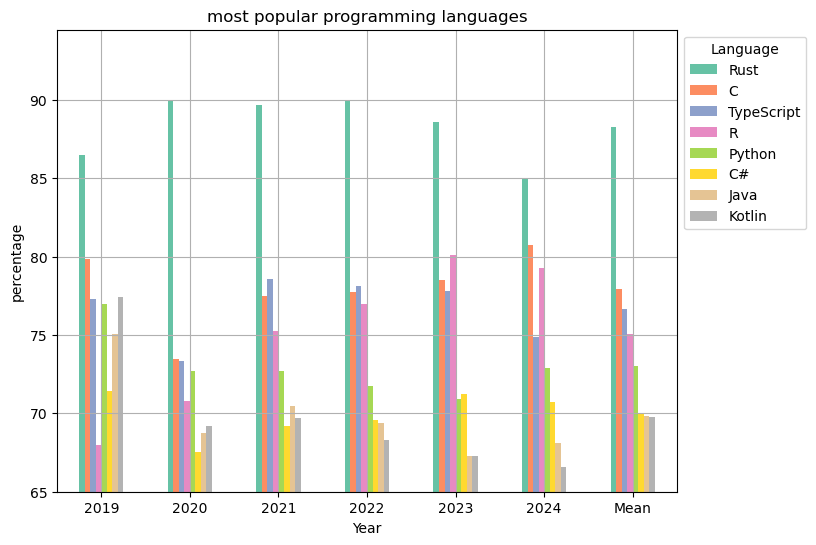

In [35]:
# plot the 8 most popular languages
(popularity_ratios_df.iloc[:, :8]*100).plot(kind='bar', figsize=(8, 6), rot=0,\
    grid=True, colormap='Set2', ylabel='percentage', title='most popular programming languages', ylim=65)
plt.legend(title='Language', bbox_to_anchor=(1.0, 1.0))

<Axes: title={'center': 'mean popularity of all programming languages'}, ylabel='percentage'>

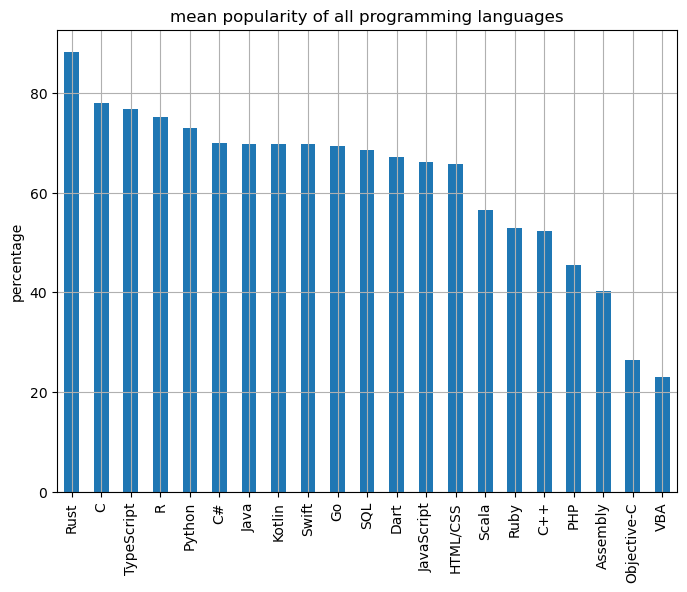

In [36]:
# plot the mean popularity score for all languages
(popularity_ratios_df.iloc[-1, :]*100).plot(kind='bar', figsize=(8, 6),\
    grid=True, colormap='tab20', ylabel='percentage', title='mean popularity of all programming languages', ylim=0)
# plt.legend(title='Language', bbox_to_anchor=(1.0, 1.0))